# Image Segmentation - Boundary Detection with Image Contours

In this first practice notebook of the image segmentation techniques we would work with boundary detection using the image contours. In the same context previously we did some exercise on separating objects from the background and even replacing the background for an object. That exercise is also relevant here. Hence we'd start with a recap of that exercise.

We'd separate an object from the background and replace the original background using the HSV color space. From their the idea of separating an object from the background using te image contour would stem.

In [29]:
# Import necessary modules and packages
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

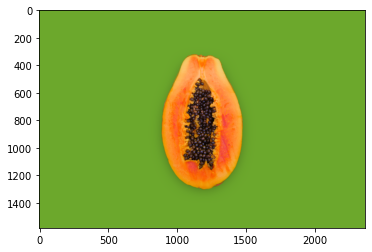

In [30]:
# Import image resource and visualize
papaya: np.ndarray = cv2.imread(filename='images/papaya.png')
papaya = cv2.cvtColor(src=papaya, code=cv2.COLOR_BGR2RGB)
plt.imshow(papaya)

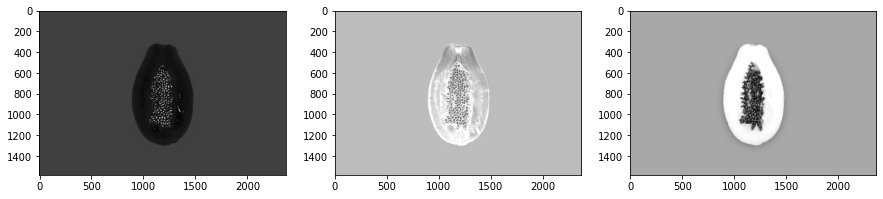

In [31]:
# Convert the image into HSV color space create mask for separating the background
papaya_hsv: np.ndarray = cv2.cvtColor(src=papaya, code=cv2.COLOR_RGB2HSV)
h, s, v = papaya_hsv[:, :, 0], papaya_hsv[:, :, 1], papaya_hsv[:, :, 2]
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(h, cmap='gray')
ax2.imshow(s, cmap='gray')
ax3.imshow(v, cmap='gray')

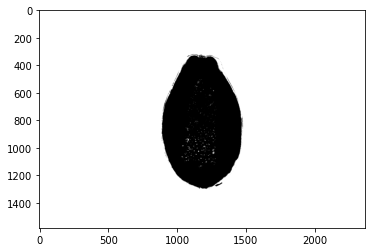

In [32]:
lower_bound: np.ndarray = np.array([20, 0, 0])
upper_bound: np.ndarray = np.array([45, 255, 255])
mask: np.ndarray = cv2.inRange(src=papaya_hsv, lowerb=lower_bound, upperb=upper_bound)
plt.imshow(mask, cmap='gray')

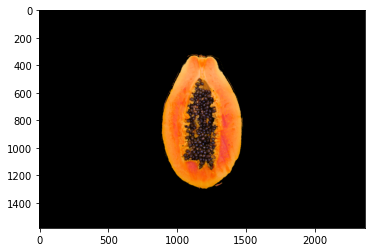

In [33]:
# Make a copy of the rgb image and see the effect of the mask
papaya_copy: np.ndarray = np.copy(papaya)
papaya_copy[mask != 0] = 0
plt.imshow(papaya_copy)

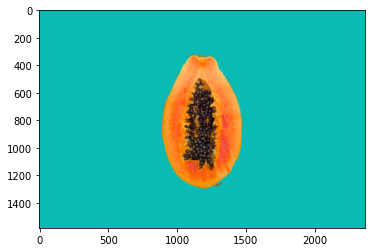

In [34]:
# Replace the background
background: np.ndarray = cv2.imread(filename='images/background.jpg')
background = cv2.cvtColor(src=background, code=cv2.COLOR_BGR2RGB)
background[mask == 0] = 0
papaya_new: np.ndarray = papaya_copy + background
plt.imshow(papaya_new)

With the exercise above we tried to recall one aspect, where we separated the object of interest from the background. With this image segmentation we would do the same by creating a boundary along the object image using image contours.

## Image Contours

Some example applications of image contours are found in motion detection and image segmentation as described in this [article](https://learnopencv.com/contour-detection-using-opencv-python-c/).

When we join all the points on the boundary of an object, we get a contour. Typically, a specific contour refers to boundary pixels that have the same color and intensity. In this exercise two [OpenCV](https://docs.opencv.org/4.x/d4/d73/tutorial_py_contours_begin.html) functions would be fundamental for us.

* [findContours](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0) finds the contour in a binary image, more specifically an 8-bit single-channel image. Non-zero pixels are treated as 1's. Zero pixels remain 0's, so the image is treated as binary . You can use compare, inRange, threshold , adaptiveThreshold, Canny, and others to create a binary image out of a grayscale or color one. If mode equals to RETR_CCOMP or RETR_FLOODFILL, the input can also be a 32-bit integer image of labels (CV_32SC1). Following parameters are therefore relevant for us.

    * `image` - Binary image
    * `mode` - [RetrievalModes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga819779b9857cc2f8601e6526a3a5bc71), retrieval for contours.
    * `method` - [ContourApproximationModes](https://docs.opencv.org/4.x/d3/dc0/group__imgproc__shape.html#ga4303f45752694956374734a03c54d5ff), approximation mode for contours. Following are the approximation algorithms, which are relevant for us in this exercise.
    
        * `cv2.CHAIN_APPROX_NONE` algorithm stores absolutely all the contour points. That is, any 2 subsequent points (x1,y1) and (x2,y2) of the contour will be either horizontal, vertical or diagonal neighbors, that is, max(abs(x1-x2),abs(y2-y1))==1.
        
        * `cv2.CHAIN_APPROX_SIMPLE` algorithm compresses horizontal, vertical, and diagonal segments and leaves only their end points. For example, an up-right rectangular contour is encoded with 4 points.

* [drawContours](https://docs.opencv.org/4.x/d6/d6e/group__imgproc__draw.html#ga746c0625f1781f1ffc9056259103edbc) plots the contours on the image. Following parameters are relevant for us.

    * `image` - Destination image.

    * `contours` - Collection of points making the contour.

    * `contourIdx` - Parameter indicating a contour to draw. If it is negative, all the contours are drawn.

    * `color` - Color for the contours.
    
    * `thickness` - Thickness of lines the contours are drawn with. If it is negative (for example, thickness=FILLED ), the contour interiors are drawn.

In simpler terms in order to find the image contours we need to prepare the binary image using threshold or edge detection. The quality of the image boundary depends on the quality of the binary image. The algorithm needs to clearly detect the intensity difference at the edges. 

In [35]:
# Create binary form for the papaya image
papaya_gray: np.ndarray = cv2.cvtColor(src=papaya, code=cv2.COLOR_RGB2GRAY)
# Comparing between the cv2.THRESH_BINARY and cv2.THRESH_BINARY_INV
_, papaya_bin = cv2.threshold(src=papaya_gray, thresh=115, maxval=255, type=cv2.THRESH_BINARY)
_, papaya_bin_inv = cv2.threshold(src=papaya_gray, thresh=115, maxval=255, type=cv2.THRESH_BINARY_INV)

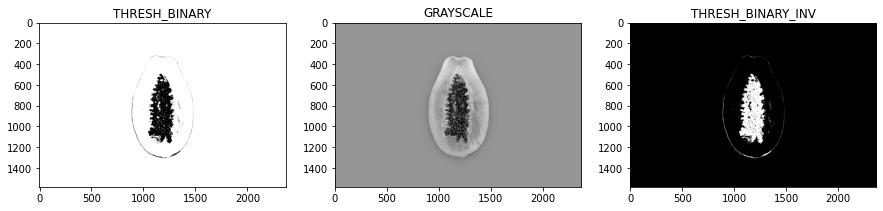

In [36]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(papaya_bin, cmap='gray')
ax1.set_title('THRESH_BINARY')
ax2.imshow(papaya_gray, cmap='gray')
ax2.set_title('GRAYSCALE')
ax3.imshow(papaya_bin_inv, cmap='gray')
ax3.set_title('THRESH_BINARY_INV');

We did not use the `cv2.THRESH_BINARY_INV` [ThresholdTypes](https://docs.opencv.org/4.x/d7/d1b/group__imgproc__misc.html#gaa9e58d2860d4afa658ef70a9b1115576) before. The way it differs from `cv2.THRESH_BINARY` is, that THRESH_BINARY makes every pixel having intensity greater than threshold set to max intensity and everything less than threshold to 0. In contrast, THRESH_BINARY_INV does the opposite. It makes every pixel having intensity greater than threshold set to 0 and everything less than threshold set to 255.

Usually inverse binary threshold images are good for contour detection. Let's take that and try to use both of our algorithms to see, what kind of contours we can detect for the image.

In [37]:
# Find the contours using method cv2.CHAIN_APPROX_NONE and cv2.CHAIN_APPROX_SIMPLE algorithms
contours_none, hierarchy = cv2.findContours(image=papaya_bin_inv, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
contours_simple, hierarchy = cv2.findContours(image=papaya_bin_inv, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

In [38]:
papaya_cp_none: np.ndarray = np.copy(papaya)
papaya_cp_simple: np.ndarray = np.copy(papaya)
papaya_cp_none = cv2.drawContours(image=papaya_cp_none, contours=contours_none, contourIdx=-1, color=(0, 0, 255), thickness=10)
papaya_cp_simple = cv2.drawContours(image=papaya_cp_simple, contours=contours_simple, contourIdx=-1, color=(0, 0, 255), thickness=10)

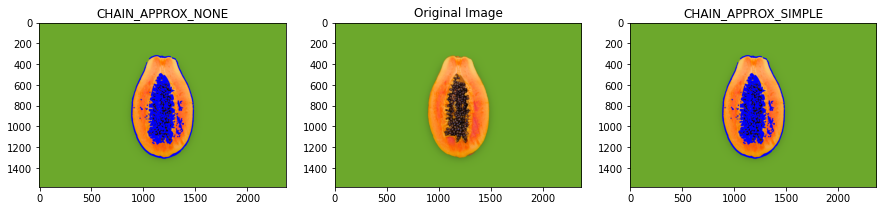

In [39]:
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(papaya_cp_none)
ax1.set_title('CHAIN_APPROX_NONE')
ax2.imshow(papaya)
ax2.set_title('Original Image')
ax3.imshow(papaya_cp_simple)
ax3.set_title('CHAIN_APPROX_SIMPLE');

We have discovered image contours, which we have drawn along the boundary of the object using `drawContours` function. We also see, that using `CHAIN_APPROX_NONE` and `CHAIN_APPROX_SIMPLE` did not make any difference noticeable difference for us. The algorithm `CHAIN_APPROX_SIMPLE` usually results is fewer contour points, but in this case we see no difference, because the `drawContour` function connects the adjacent points as described in this [article](https://learnopencv.com/contour-detection-using-opencv-python-c/).

The papaya image is tricky to handle. Let's try the process once more with a simpler image.

In [40]:
# Import the hand image
thumbs: np.ndarray = cv2.imread(filename='images/thumbs_up_down.jpg')
thumbs = cv2.cvtColor(src=thumbs, code=cv2.COLOR_BGR2RGB)
thumbs_gray: np.ndarray = cv2.cvtColor(src=thumbs, code=cv2.COLOR_RGB2GRAY)

In [41]:
# Create binary image with threshold
_, thumbs_bin = cv2.threshold(src=thumbs_gray, thresh=220, maxval=255, type=cv2.THRESH_BINARY_INV)

In [42]:
# Find contours from binary image
thumbs_contour, _ = cv2.findContours(image=thumbs_bin, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_SIMPLE)

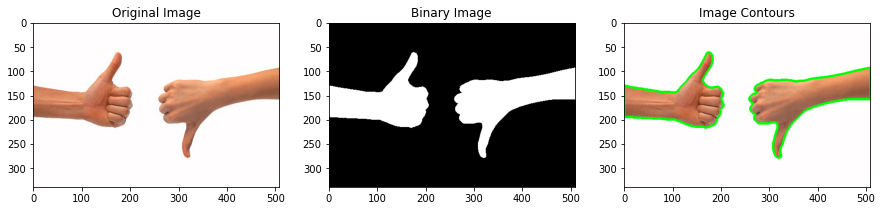

In [44]:
# Copy the original image and draw the contours
thumbs_copy: np.ndarray = np.copy(thumbs)
thumbs_copy = cv2.drawContours(image=thumbs_copy, contours=thumbs_contour, contourIdx=-1, color=(0, 255, 0), thickness=3)
_, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 15))
ax1.imshow(thumbs)
ax1.set_title('Original Image')
ax2.imshow(thumbs_bin, cmap='gray')
ax2.set_title('Binary Image')
ax3.imshow(thumbs_copy)
ax3.set_title('Image Contours');